In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#%cd gdrive/My Drive/Master Thesis/DeepRL

In [ ]:
#!ls -l

In [ ]:
#!apt-get update -y && apt-get install -y xvfb && apt-get install -y python-opengl && apt-get install -y cmake && apt-get install -y zlib1g zlib1g-dev

In [ ]:
#!pip install gym pyvirtualdisplay pyglet box2d-py atari_py pystan ipywidgets==7.6.5 jupyter_contrib_nbextensions

## Imports

In [1]:
from agents.DQN_Agent import DQN_Agent
from helpers.plot_util import *

2021-11-11 11:16:28.045735: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-11 11:16:28.046086: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Create DQN_Agent

In [2]:
agent= DQN_Agent(
                 env_name="CartPole-v1",
                 gamma=0.98,             ## 0.98 was good for Cartpole###############################
                 epsilon=1.0,
                 layer1_size=32, 
                 layer2_size=32,             
                 lr=0.001,               
                 mem_size=100000000,
                 batch_size=64,          #1024,    ########## with 1024 was good for Cartpole #######
                 epsilon_dec=0.0001,     #0.0003, ###### 0.0005 was OKAY not so good for Cartpole ###
                 epsilon_end=0.01,       #######_____________#####_____________________##############
                 reproduce_seed=None#42
                )

# If you want to first train an agent use this cell ❎

Eps: 2 ,  Eps steps: 18 ,Epsilon: 1.00, Ep_Reward : 18.00 , Average_Reward : 17.00

/opt/conda/lib/python3.9/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2021-11-11 11:16:41.735162: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-11 11:16:41.735260: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-11 11:16:41.735304: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (53b99e672bb6): /proc/driver/nvidia/version does not exist
2021-11-11 11:16:41.735914: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the followin

Eps: 500 ,  Eps steps: 500 ,Epsilon: 0.01, Ep_Reward : 500.00 , Average_Reward : 354.13
 Agent trained.....

 Saving Model info.....

 CartPole-v1 Problem took 500 episodes


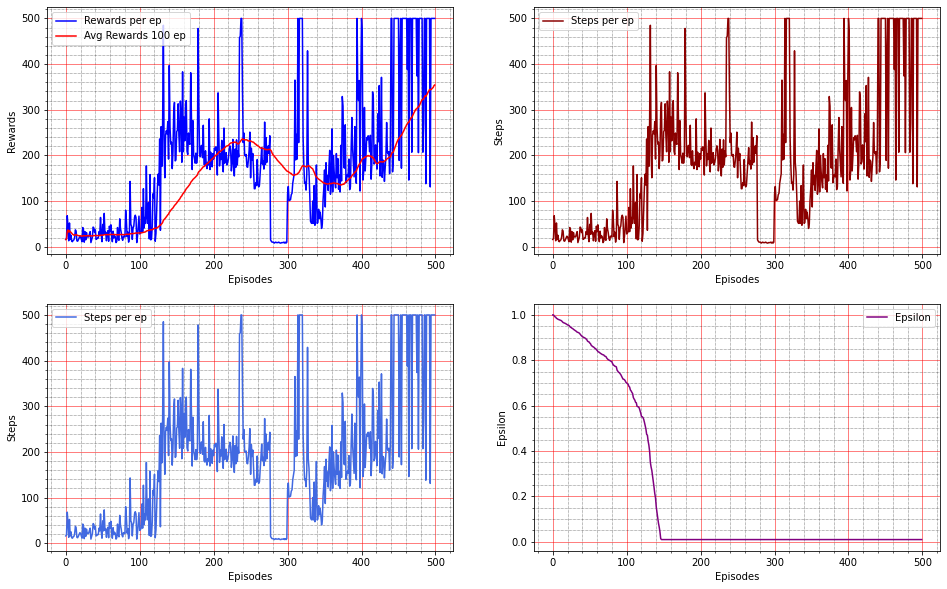

In [3]:
agent.train_multiple_episodes(num_episodes=500)    ## 500 was good hann tha toh acha kya kahte ho aap
model,book_keeping=agent.get_trained_model_info()
# plot Learning curve
learning_plot(book_keeping)

## Run this cell to check performance on 16 Test Cases

pyvirtualdisplay successfully imported
Tests # 42 , Rewards 500.0 , Steps 500
Tests # 900 , Rewards 500.0 , Steps 500
Tests # 930 , Rewards 135.0 , Steps 135
Tests # 180 , Rewards 500.0 , Steps 500
Tests # 660 , Rewards 500.0 , Steps 500
Tests # 240 , Rewards 500.0 , Steps 500
Tests # 960 , Rewards 500.0 , Steps 500
Tests # 450 , Rewards 500.0 , Steps 500
Tests # 30 , Rewards 500.0 , Steps 500
Tests # 90 , Rewards 500.0 , Steps 500
Tests # 150 , Rewards 144.0 , Steps 144
Tests # 210 , Rewards 500.0 , Steps 500
Tests # 330 , Rewards 147.0 , Steps 147
Tests # 420 , Rewards 500.0 , Steps 500
Tests # 510 , Rewards 258.0 , Steps 258
Tests # 75 , Rewards 500.0 , Steps 500


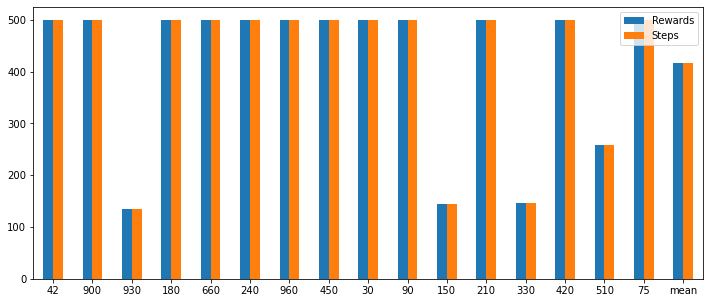

In [4]:
if agent.trained:
  test_cases_data,image_paths =agent.run_test_instances(case_list=[42,900,930,180,660,240,960,450,30,90,150,210,330,420,510,75], model_=model)
  # Plot Test cases data
  plot_test_cases(test_cases_data)

### Save the trained model manually

In [ ]:
agent.save_model()

# If you want to use a pretrained model use this cell ❎

In [ ]:
if not agent.trained:
  # Good Models 20211108-194235 ,  20211108-082804 , 20211109-182644 , 20211111-113810
  # not so good models 20211111-111248
  model_suffix="20211108-082804" # some 
  model,book_keeping , image_paths = agent.load_pre_trained_model_info(timestr=model_suffix)
  # plot Learning curve
  learning_plot(book_keeping)


### Render the 16 Test Case gif's : ⏩

In [5]:
import IPython.display as display
import ipywidgets as widgets
from ipywidgets import GridspecLayout

rows=8
cols=4
grid = GridspecLayout(rows,cols)
index_of_img=0
for i in range(0,rows,2):
    for j in range(cols):
        
        path_of_img=image_paths[index_of_img]
        img=open(path_of_img,'rb').read()
        
        grid[i, j] = widgets.Image(value=img, format='gif', width=220, height=510)
        grid[i+1, j] = widgets.HTML(value=path_of_img[path_of_img.index('IMAGES/')+7 :])
        index_of_img+=1
        
        

grid

GridspecLayout(children=(Image(value=b'GIF89aX\x02\x90\x01\x82\x00\x00\x00\x00\x00\xcc\x99fff\xcc\x99\x99\xcc\…

# Conclusions for DQN Agents

*   Agent doesnot generalize quite well to other instances of enviroment when we use reproducable seeds for libraries
*   Agent's learning is dependent on initial weights of the Model. 
*   We had to train the agent on different set of Model architectures and other set of hyperparameters in order to determine a workable one which could generalize well to other instances of the environment.   
*   Depedinig upon the enviroment specification Agent's learning performance may drop significatly after some episodes of training because of a phenomenon in neural networks called catastrophic forgetting

# Recommendations required ⚓

*   How to rearrange the DQN agents notebooks for results and analysis purposes ?
*   How should the minute details about the code in Thesis ? 
*   Use of Docker image since some libraries like gif rendering require libraries which are specific to OS kernel.